#### Deep Net Project but in PyTorch (based off of shallow net in PyTorch)

We are using the same MNIST digit classifier but implementing in PyTorch rather than Tensorflow

In [1]:
import sys
print(sys.executable)

/Users/alexjiang/miniforge3/envs/tf_macos/bin/python3.9


In [2]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary #enables model summary

import matplotlib.pyplot as plot #create plots to visulalize inputs/outputs

#### Loading the data

- 'data' => must specify directory to put the data into (directory called 'data')
- train => specify if the data is the training data or not the training data
- transform => we would like to reshape our inputs (normalize them). This is what the .ToTensor() method does
- download => need to download to data directory for first block of data inputted (training)


In [3]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())

# .ToTensor() normalizes the input values from [0, 255] to [0,1]


In [4]:
train.data.shape

torch.Size([60000, 28, 28])

In [5]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

#### THE PIXELS ARE NOT NORMALIZED!! WHAT IS GOING ON??

- The values will be transformed when we train the model, but won't be transformed if we view it right now

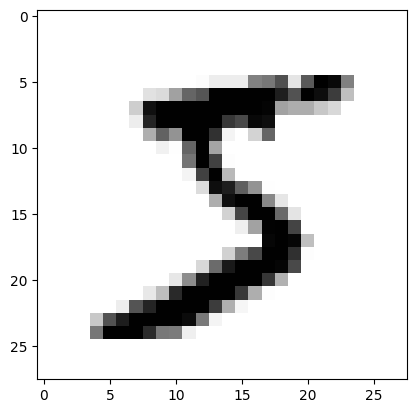

In [6]:
plot.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [7]:
train.targets[:20] #gives the first 20 expected outputs for what our model should predict

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])

In [8]:
train.targets.shape #60k y-values to predict from the dataset

torch.Size([60000])

In [9]:
test.data.shape # an input is 28x28 pixels, and there are 10k of them in testing

torch.Size([10000, 28, 28])

In [10]:
test.targets.shape #10k inputs means 10k outputs

torch.Size([10000])

#### Batch the data for SGD

Done with a <b>data loader</b>

In [11]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128,  shuffle=True) 
#need to specify shuffle so that GD can be performed on a random batch of inputs (stochastic gradient descent)

test_loader = torch.utils.data.DataLoader(test, batch_size=128) 
# ^ no need to perform GD on testing, just need to iterate on all batches of data to see results


Sample a single data point (aka single batch)

In [12]:
x_sample, y_sample = next(iter(train_loader))


In [13]:
x_sample.shape #128 28x28 input grids, each grid is 1 for greyscale (black/white only)

torch.Size([128, 1, 28, 28])

In [14]:
y_sample.shape #128 outputs for 128 inputs as expected

torch.Size([128])

In [15]:
y_sample

tensor([1, 0, 0, 7, 3, 6, 1, 4, 2, 0, 1, 4, 8, 8, 5, 6, 6, 7, 6, 9, 7, 9, 1, 4,
        4, 9, 9, 3, 9, 6, 9, 1, 2, 7, 7, 1, 8, 6, 8, 5, 4, 4, 3, 2, 4, 1, 0, 9,
        7, 6, 1, 9, 3, 8, 1, 1, 9, 1, 3, 4, 7, 2, 2, 3, 8, 1, 6, 8, 7, 3, 6, 5,
        5, 3, 8, 6, 7, 2, 4, 4, 5, 8, 7, 8, 4, 7, 9, 8, 0, 9, 8, 5, 1, 2, 3, 8,
        3, 1, 2, 6, 8, 3, 5, 0, 9, 6, 7, 4, 8, 9, 8, 3, 7, 3, 4, 3, 9, 3, 2, 9,
        4, 0, 4, 0, 6, 5, 2, 9])

#### Now the data has been normalized!

In [16]:
x_flat_sample = x_sample.view(x_sample.shape[0], -1) #view() actually reshapes the tensor

#-1 is let the model "figure it out" what number to put

In [17]:
x_flat_sample.shape

torch.Size([128, 784])

In [18]:
x_flat_sample

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

#### Design the deep network architecture

In [19]:
N_INPUT = 784
N_DENSE_1 = 64
N_DENSE_2 = 64
N_DENSE_3 = 64
N_OUT = 10

In [23]:
model = nn.Sequential(
    nn.Linear(N_INPUT, N_DENSE_1), # hidden layer #1 
    nn.ReLU(),
    

    nn.Linear(N_DENSE_1, N_DENSE_2), #hidden layer #2
    nn.Tanh(),
    
    nn.Linear(N_DENSE_2, N_DENSE_3), #hidden layer #3
    nn.Sigmoid(),
    nn.Dropout(), #dropout in the last hidden layer
    
    nn.Linear(N_DENSE_3, N_OUT) #output layer
    

)

In [22]:
summary(model, (1, N_INPUT)) #same dimensions as shallow net in tensorflow

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
              ReLU-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 64]           4,160
              Tanh-4                [-1, 1, 64]               0
            Linear-5                [-1, 1, 64]           4,160
           Sigmoid-6                [-1, 1, 64]               0
           Dropout-7                [-1, 1, 64]               0
            Linear-8                [-1, 1, 10]             650
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.23
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


#### Configuring training hyperparameters

In [24]:
cost_function = nn.CrossEntropyLoss() #already includes softmax activation (no need to include in model above)

In [25]:
optimizer = torch.optim.Adam(model.parameters()) #using adam instead of standard SGD

#### Evaluate the performance

PyTorch doesn't have built in accuracy metric like TensorFlow, so need to make own accuracy function

In [26]:
def accuracy(pred_y, true_y):
    fillder, prediction = torch.max(pred_y, 1)
    correct = (prediction == true_y).sum().item()
    return (correct / true_y.shape[0]) * 100 #outputs the number of labels that were classified correctly as %

In [27]:
n_batches = len(train_loader)
print(n_batches)

469


In [31]:
n_epochs = 10

#Need to specify the training should proceed

print(f'training for {n_epochs} epochs')

for epoch in range(n_epochs):
    avg_cost = 0
    avg_acc = 0
    
    for i, (x,y) in enumerate(train_loader): #enumerate is count of iterations
        
        #forward propogation step: 
        flattened_x = x.view(x.shape[0], -1) # flatten the inputs
        y_hat = model(flattened_x) #get the predicted y-hat value for given input
        cost = cost_function(y_hat, y) #pass in the y/y-hat values into loss function to get overall loss
        avg_cost += cost/n_batches
        
    
        
        #back propogation step:
        optimizer.zero_grad() #set the gradients to 0 prior to learning new ones
        cost.backward() #apply back propogation to the object (determines the new weights/biases each epoch)
        optimizer.step() #updating the gradients based on the back propgation gradients in cost.backward()
        
        #accumulate accuracy metric
        acc = accuracy(y_hat, y)
        avg_acc += acc / n_batches
        
        if (i+1) % 100 == 0:
            #every 100th iteration, print out the step
            print(f'step {i+1}')
            
            #i+1 due to wanting to start counting at 1 epoch (not 0)
        
    print(f"Epoch {epoch+1}/{n_epochs} complete")
    print(f"Cost: {avg_cost}")
    print(f"Accuracy: {avg_acc}\n")
        
        
        
print("Training complete")
        
    

training for 10 epochs
step 100
step 200
step 300
step 400
Epoch 1/10 complete
Cost: 0.04323025792837143
Accuracy: 98.76288201847912

step 100
step 200
step 300
step 400
Epoch 2/10 complete
Cost: 0.037915848195552826
Accuracy: 98.92002043354665

step 100
step 200
step 300
step 400
Epoch 3/10 complete
Cost: 0.03242556378245354
Accuracy: 99.06994047619061

step 100
step 200
step 300
step 400
Epoch 4/10 complete
Cost: 0.02923092059791088
Accuracy: 99.15711620469096

step 100
step 200
step 300
step 400
Epoch 5/10 complete
Cost: 0.02713686414062977
Accuracy: 99.19542910447775

step 100
step 200
step 300
step 400
Epoch 6/10 complete
Cost: 0.02264893613755703
Accuracy: 99.34812544420775

step 100
step 200
step 300
step 400
Epoch 7/10 complete
Cost: 0.02069159597158432
Accuracy: 99.41142501776852

step 100
step 200
step 300
step 400
Epoch 8/10 complete
Cost: 0.018263746052980423
Accuracy: 99.46861673774008

step 100
step 200
step 300
step 400
Epoch 9/10 complete
Cost: 0.017906537279486656
Accu

#### Evaluating our model

Recall that we want to disable any droupout and batch normalization while evaluting so that we can evaluate the performance of the entire network by itself

In [29]:
n_test_batches = len(test_loader)
print(n_test_batches)


# outputs the number of batches we have to evaluate 

# 10k validation points total, and 128 points/batch, so 10k/128 = 78.125 which is 79 total batches. 

79


In [32]:
model.eval() #disable dropout and batch norm

with torch.no_grad():
    avg_test_cost = 0
    avg_test_acc = 0
    
    for x,y in test_loader:
        #prediction output for validation data
        flat_input = x.view(x.shape[0], -1)
        y_hat = model(flat_input)
        
        # calculate cost:
        cost = cost_function(y_hat, y) #order matters, always y_hat then y
        
        avg_test_cost += cost / n_test_batches
        
        #calculate accuracy
        test_acc = accuracy(y_hat, y)
        avg_test_acc += test_acc / n_test_batches
        
    
print(f'Test cost: {avg_test_cost} ')
print(f'Test accuracy: {avg_test_acc} ')    

Test cost: 0.10531873255968094 
Test accuracy: 97.76503164556965 


#### Note:

May see the test accuracy be HIGHER than the training accuracy (avg training accuracy). This is because the value displayed at each epoch during the training in the current accuracy at the <b>start</b> of the epoch! 

Therefore, after that last epoch, the accuracy might have improved and we can see that in the test accuracy results.